In [49]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [5]:
dt = pd.read_csv("U4_04_train.csv")
dt.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Como tenemos muchos datos de la edad que son vacios y estos no los queremos eliminar debido a que son pocos datos, para ello tomamos el promedio de los datos para luego rellenar los que estan vacios

In [9]:
dt["Age"] = dt["Age"].fillna(dt["Age"].mean())
dt["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

Eliminamos esta columna que relamente no nos sirve para el analisis

In [10]:
dt_drop = dt.drop(["Cabin"], axis = 1)
dt_drop

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [11]:
dt_drop = dt_drop.dropna() # este nda mas se hizo para votar los datos de embarked no el resto
dt_drop.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Tambien eliminamos los datos de estas columnas que es mera informacon que no nos ayuda en gran cosa

In [12]:
dt_drop = dt_drop.drop(["Name", "PassengerId", "Ticket"], axis = 1)


Para esta linea hay una drop_first = True, esto significa que vamos a eliminar la primera columna de nuestra informacion debido a que esto es una informacion redudnate, porque si no eres hombre, debes ser mujer, por ende tener dos colummnas que digan l mismo pero dos vez, seria muy redundante y puede hacer que el modelo toma mucha importancia en ello, más de la necesaria

In [13]:
dt_drop = dt_drop.join(pd.get_dummies(dt_drop["Sex"], dtype = int, drop_first = True))

In [14]:
dt_drop = dt_drop.drop("Sex", axis = 1)
dt_drop

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.000000,1,0,7.2500,S,1
1,1,1,38.000000,1,0,71.2833,C,0
2,1,3,26.000000,0,0,7.9250,S,0
3,1,1,35.000000,1,0,53.1000,S,0
4,0,3,35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,S,1
887,1,1,19.000000,0,0,30.0000,S,0
888,0,3,29.699118,1,2,23.4500,S,0
889,1,1,26.000000,0,0,30.0000,C,1


<Axes: xlabel='Survived', ylabel='count'>

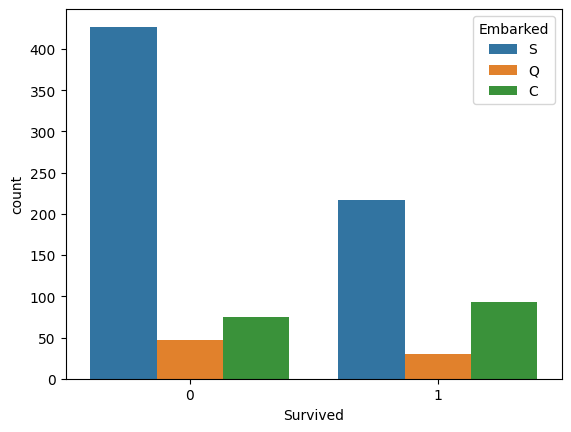

In [15]:
sb.countplot(x = "Survived", data = dt_drop, hue = "Embarked")

In [16]:
dt_drop = dt_drop.join(pd.get_dummies(dt_drop["Embarked"], dtype = int, drop_first = True))

In [17]:
dt_drop = dt_drop.drop(["Embarked"], axis = 1)
dt_drop

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


<Axes: >

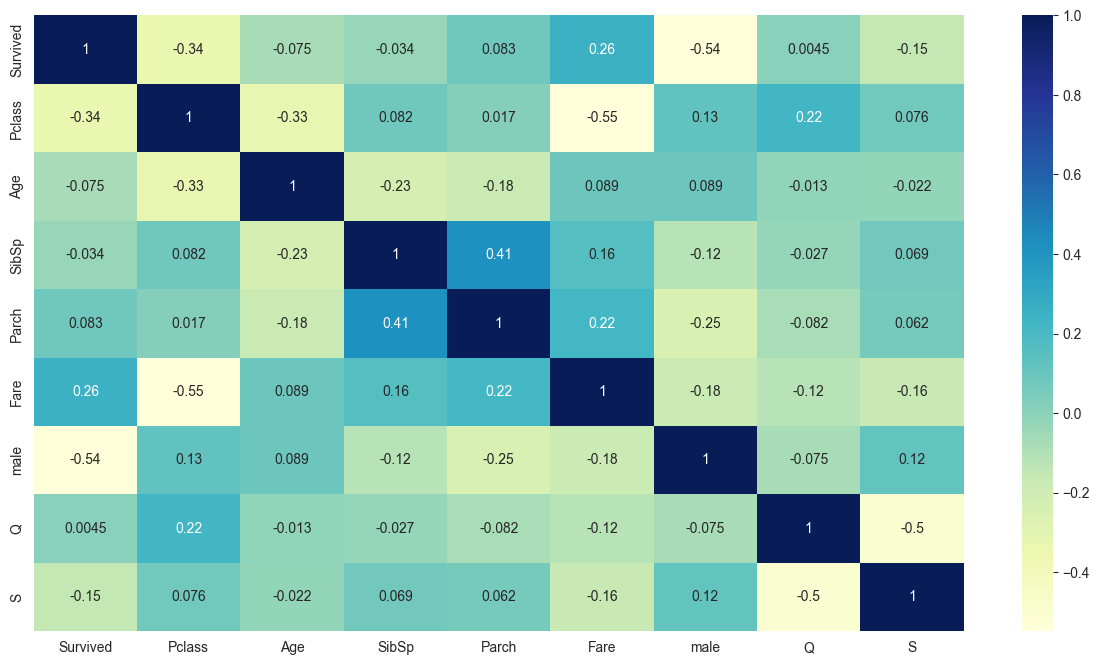

In [18]:
sb.set({"figure.figsize": (15,8)})
sb.heatmap(dt_drop.corr(), annot = True, cmap = "YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

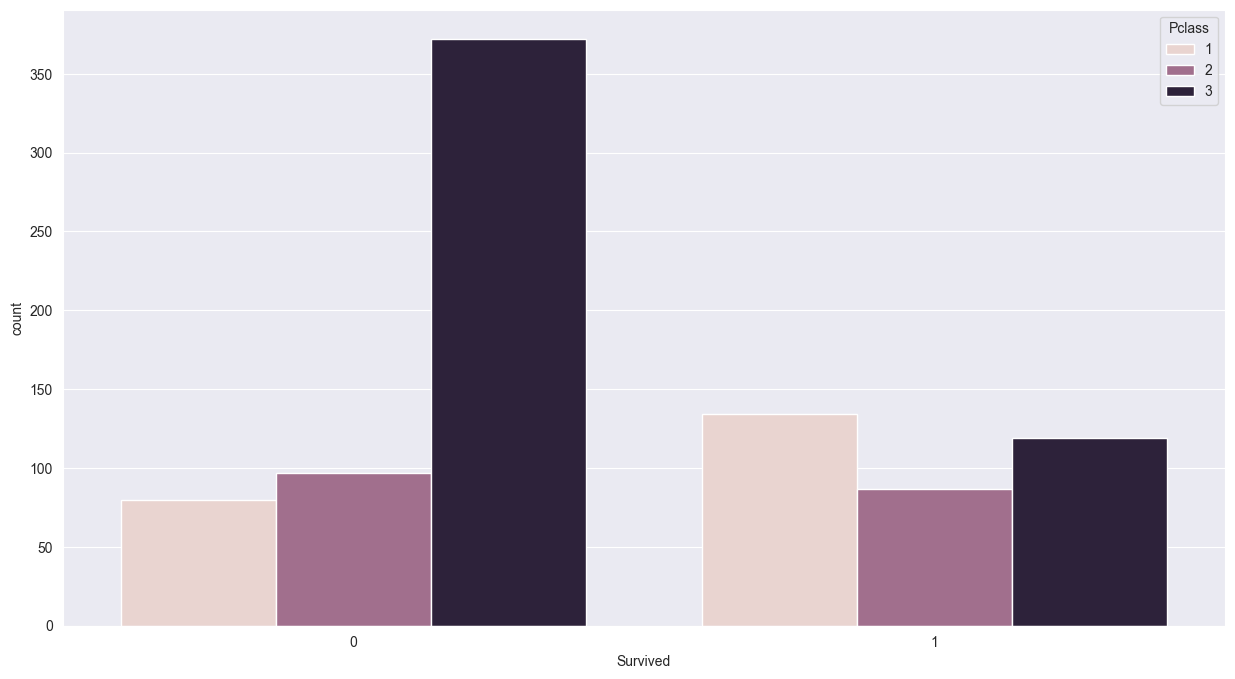

In [19]:
sb.countplot(x = "Survived", data= dt_drop , hue = "Pclass")

In [20]:
Caract = dt_drop.drop(["Survived"], axis = 1)
eti = dt_drop["Survived"]

In [42]:
caract_ent, caract_prue, eti_ent, eti_prue = train_test_split(Caract, eti, test_size = 0.6)

Aqui declaramos el arbol de decisiones el cual, como se puede ver tiene un max_depth, esto se refiere a cuantas preguntas o decisiones debe tomar como maximo, debio a que no siempre hacer mas preguntas nos va a resultar, mejor todo depende del tipo de los datos, para ello podemos ver como trabaj con una profundidad de 1 a 9, y el mejor resultado nos da 4 de profundidad maximo

In [45]:
results = []
for i in range (1,10):

    model = DecisionTreeClassifier(max_depth=i)
    model.fit(caract_ent, eti_ent)
    predict = model.predict(caract_prue)
    prediccion =pd.DataFrame({"Predicción": predict, "Resultado real ": eti_prue})

    error = accuracy_score(eti_prue, predict)
    results.append(error)
    print(f"El porcentaje de efectiviad del modelo {i} fue de {error*100}")


El porcentaje de efectiviad del modelo 1 fue de 78.65168539325843
El porcentaje de efectiviad del modelo 2 fue de 78.27715355805243
El porcentaje de efectiviad del modelo 3 fue de 81.08614232209737
El porcentaje de efectiviad del modelo 4 fue de 81.46067415730337
El porcentaje de efectiviad del modelo 5 fue de 78.83895131086143
El porcentaje de efectiviad del modelo 6 fue de 80.14981273408239
El porcentaje de efectiviad del modelo 7 fue de 79.40074906367042
El porcentaje de efectiviad del modelo 8 fue de 79.40074906367042
El porcentaje de efectiviad del modelo 9 fue de 77.34082397003745


Una grafica para mirar como termina tendiendo los datos en base a la profundidad

<Axes: >

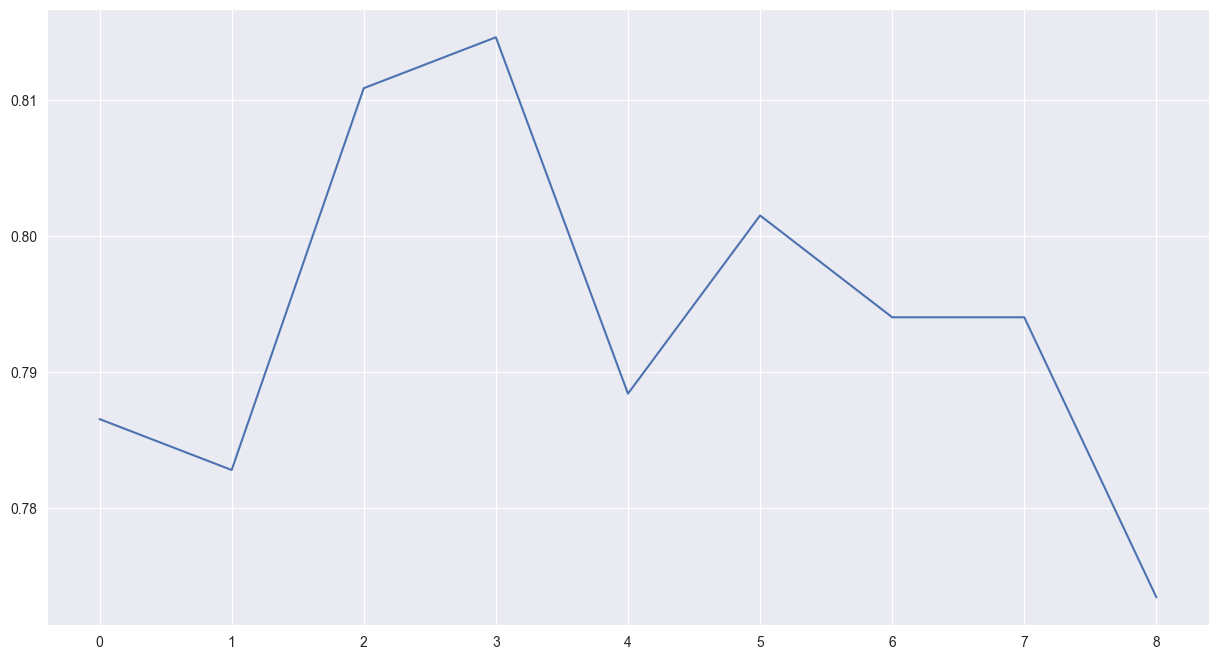

In [46]:
sb.lineplot(data = results)

In [47]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(caract_ent, eti_ent)
predict = model.predict(caract_prue)

pd.DataFrame(confusion_matrix(eti_prue, predict), columns= ["Pred: No", "Pred: Si"], index =["Real : No", "Real: Si"])

,Pred: No,Pred: Si
Real : No,310,21
Real: Si,76,127


Y por ultimo a diferencia del modelo de regresión lienal y el modelo de regresion logística, este arbol de decisiones si tiene una forma de ser graficado y poder verse de forma muy clara los resultados, usando la libreria de matplotlib, dando datos como podria ser el nombre de las columnas, el modelo a representar y si si se llena de colores los recuadros

[Text(0.5, 0.9, 'male <= 0.5\n0.474\n355\n[218.0, 137.0]\nMurió'),
 Text(0.25, 0.7, 'Pclass <= 2.5\n0.385\n127\n[33, 94]\nVivió'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'Age <= 56.0\n0.058\n67\n[2, 65]\nVivió'),
 Text(0.0625, 0.3, 'Fare <= 23.465\n0.03\n65\n[1, 64]\nVivió'),
 Text(0.03125, 0.1, '0.133\n14\n[1, 13]\nVivió'),
 Text(0.09375, 0.1, '0.0\n51\n[0, 51]\nVivió'),
 Text(0.1875, 0.3, 'Fare <= 42.875\n0.5\n2\n[1, 1]\nMurió'),
 Text(0.15625, 0.1, '0.0\n1\n[1, 0]\nMurió'),
 Text(0.21875, 0.1, '0.0\n1\n[0, 1]\nVivió'),
 Text(0.375, 0.5, 'Fare <= 23.7\n0.499\n60\n[31.0, 29.0]\nMurió'),
 Text(0.3125, 0.3, 'S <= 0.5\n0.495\n51\n[23.0, 28.0]\nVivió'),
 Text(0.28125, 0.1, '0.408\n21\n[6, 15]\nVivió'),
 Text(0.34375, 0.1, '0.491\n30\n[17, 13]\nMurió'),
 Text(0.4375, 0.3, 'Age <= 7.5\n0.198\n9\n[8, 1]\nMurió'),
 Text(0.40625, 0.1, '0.444\n3\n[2, 1]\nMurió'),
 Text(0.46875, 0.1, '0.0\n6\n[6, 0]\nMurió'),
 Text(0.75, 0.7, 'Pclass <= 1.5\n0.306\n228\n[185, 43]\nMurió'),
 Text(0.625, 0

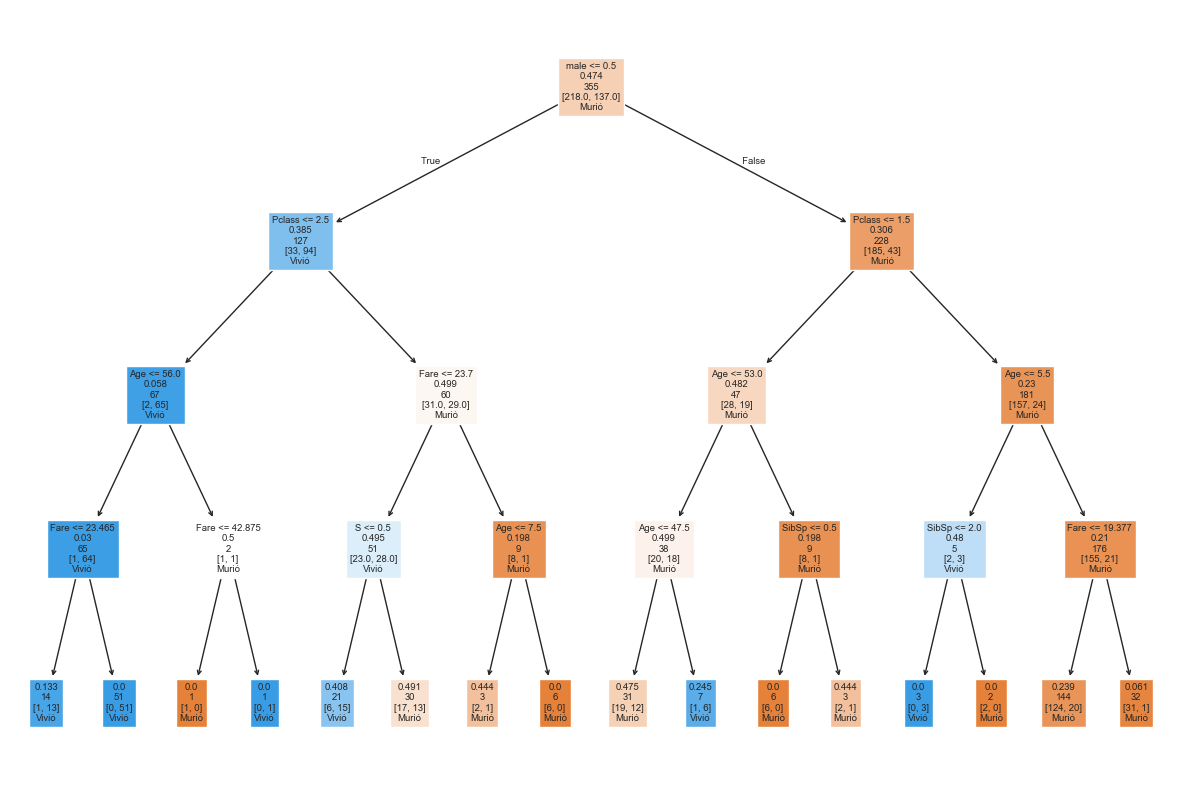

In [59]:
plt.figure (figsize= (15, 10))
plot_tree( model,
          feature_names=caract_ent.columns,
          class_names= ["Murió","Vivió"],
          filled = True,
          label = "none"
)